#  Employee Retention Analysis

### To predict whether an employee will stay or leave the company.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as nu
import seaborn as se

### Loading Dataset using pandas

In [2]:
data=pd.read_csv("HR_comma_sep.csv")

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
# So in the given dataset  employees left is denoted by 1 and employees who stay with the company is denoted by 0
# no of employees left = 3571
# no of employees who stay with the company =11428

#### Checking for null values

In [6]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
# From above outputit is clear that there are no null values.

#### Sanity Check

In [7]:
data[['satisfaction_level','last_evaluation']].describe()

,satisfaction_level,last_evaluation
count,14999.000000,14999.000000
mean,0.612834,0.716102
std,0.248631,0.171169
min,0.090000,0.360000
25%,0.440000,0.560000
50%,0.640000,0.720000
75%,0.820000,0.870000
max,1.000000,1.000000


In [ ]:
# From above output it is clear that both satisfaction level and last evaluation are between 0-1

### Features Selection

In [8]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


#### HeatMap between all the features

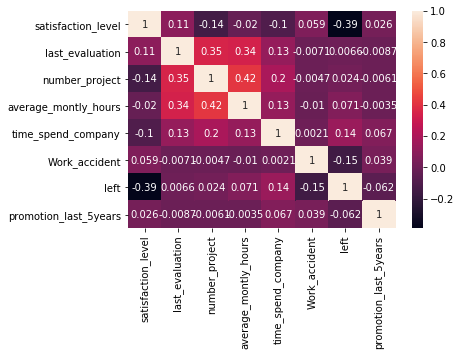

In [9]:
se.heatmap(data.corr(),annot=True)

In [10]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [ ]:
# We can see from above  that
# 1 Satisfaction level of 0.44 or below employee left the comapny
# 2 Average monthly hours are higher for employee leaving the compnay
# 3 Promotion last 5 years: we can see that employee getting promotion are likely to stay in the company.
# 4 For the remaining factors we can say that there is not much dependency as average value are almost same.

#### Bar charts showing impact of employee salaries on retention

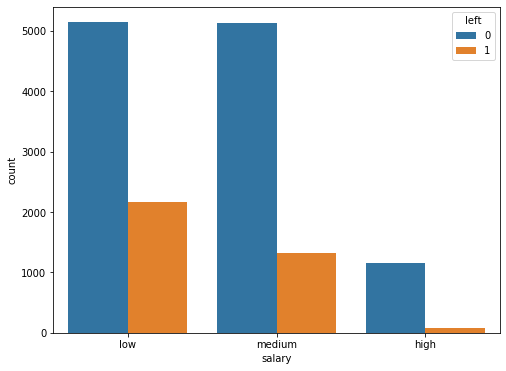

In [11]:
plt.figure(figsize=(8,6))
se.countplot(data['salary'],data=data,hue=data['left'])

In [ ]:
####  We can  from above plot that employee with higher salary not likely to left

#### Bar charts showing relation between department and employee retention

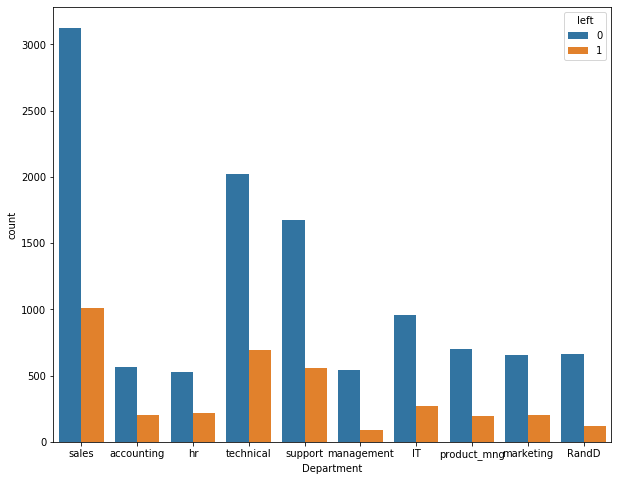

In [12]:
plt.figure(figsize=(10,8))
se.countplot(data['Department'],data=data,hue=data['left'])

In [ ]:
# From the above plot it is clear that employees from sales department tends to leave the company most as
# they also have most employee.
# Although there is some impact of department on employee retention but not that major one.

### So far till now according to the analysis it can be said that employee retention depends mostly on these 4 factors that are: 
###### 1. satisfaction_level
###### 2. salary
###### 3. promotion_last_5years 
###### 4.  average_montly_hours


### Data Preprocessing for model creation

In [13]:
inp1=data.copy()

In [14]:
inp1=inp1[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

In [15]:
inp1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


#####  Dealing with  salary column as it is in text format so converting it into dummy variables

In [16]:
inp2=pd.get_dummies(inp1['salary'])

In [17]:
inp2.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


#### Final Dataset for Model creation

In [18]:
inp3=pd.concat([inp1,inp2],axis=1)

In [19]:
inp3.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [20]:
# now dropping salary column as we got it's dummies
inp3.drop('salary',axis=1,inplace=True)

### Model Creation by using Logistic Regression as it is a classification case.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
X =inp3
X.head(2)

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1


In [23]:
y=data['left']
y.shape

(14999,)

#### Splitting dataset into train and test data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [25]:
X_train.shape

(10499, 6)

In [26]:
y_train.shape

(10499,)

In [27]:
X_test.shape

(4500, 6)

In [28]:
y_test.shape

(4500,)

In [29]:
model=LogisticRegression()

In [30]:
# fitting train data
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred=model.predict(X_test)

#### Performance Metrics for model

In [32]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score

In [33]:
confusion_matrix(y_test,y_pred)

array([[3217,  224],
       [ 792,  267]], dtype=int64)

In [34]:
accuracy_score(y_test,y_pred)

0.7742222222222223

In [35]:
recall_score(y_test,y_pred)

0.2521246458923513

In [36]:
precision_score(y_test,y_pred)

0.5437881873727087

In [37]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.93      0.86      3441\n           1       0.54      0.25      0.34      1059\n\n    accuracy                           0.77      4500\n   macro avg       0.67      0.59      0.60      4500\nweighted avg       0.74      0.77      0.74      4500\n'

In [ ]:
# So from the above metrics it can be interpreted that
# Accuracy of the model is 0.777 or 78% approximately
# Recall is 25.2 % and Precison is 60 %

### Making random prediction by using new data

In [38]:
# data for new employee for satisfaction_level,average_montly_hours,promotion_last_5years,salary level-high,low,medium
new_data=nu.array([0.5,209,1,0,1,0]).reshape(1,-1)

In [39]:
model.predict(new_data)

array([0], dtype=int64)

In [ ]:
# So for the given new data the model predict that the employee is not  going to leave the company.